# Deezer Music Data Analysis

## Data fields


The target variable of this dataset is `is_listened`. There are 7'558'834 obersvations with 14 preditors

 - `genre_id`: identifiant of the genre of the song
 - `media_id`: identifiant of the song listened by the user
 - `album_id`: identifiant of the album of the song
 - `media_duration`: duration of the song
 - `user_gender`: gender of the user
 - `user_id`: anonymized id of the user
 - `context_type` :type of content where the song was listened: playlist, album ...
 - `release_date`: release date of the song with the format YYYYMMDD
 - `ts_listen`: timestamp of the listening in UNIX time
 - `platform_name`: type of os
 - `platform_family`: type of device
 - `user_age`: age of the user
 - `listen_type` if the songs was listened in a flow or not
 - `artist_id`: identifiant of the artist of the song
 - `is_listened`: 1 refers a track was listened, 0 otherwise

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime as dt, timedelta
from time import gmtime, strftime
import time
from datetime import datetime
from datetime import date
import calendar
import matplotlib.colors as mcolors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/REC03/project/dataset'


Mounted at /content/drive


In [ ]:
%cd {path}

/content/drive/MyDrive/REC03/project/dataset


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [ ]:
# Check data type
df.dtypes

genre_id           int64
ts_listen          int64
media_id           int64
album_id           int64
context_type       int64
release_date       int64
platform_name      int64
platform_family    int64
media_duration     int64
listen_type        int64
user_gender        int64
user_id            int64
artist_id          int64
user_age           int64
is_listened        int64
dtype: object

In [ ]:
# Check missing value
print(df[df.isnull().any(1)].index) 
print(df[df.isna().any(1)].index.tolist())

# Check is na in columns
df.isna().sum()

# Check duplication
df.duplicated().sum()

Int64Index([], dtype='int64')
[]


0

## Convert interger to categorical data

In [ ]:
# Convert int to categorical data
df = df.astype({
    'genre_id':'category', 
    'media_id':'category', 
    'album_id':'category',
    'context_type':'category',
    'platform_name':'category', 
    'platform_family':'category', 
    'listen_type':'category',
    'user_gender':'category',
    'user_id':'category', 
    'artist_id':'category'})

In [ ]:
print(df.describe(include=['category']))

        genre_id   media_id  album_id  ...  user_gender  user_id  artist_id
count    7558834    7558834   7558834  ...      7558834  7558834    7558834
unique      2922     452975    151471  ...            2    19918      67142
top            0  132434634  14038232  ...            0        0    1519461
freq     3666789      20148    127230  ...      4583009     6317     163420

[4 rows x 10 columns]


In [ ]:
print(max(df['release_date']))
print(min(df['release_date']))

In [ ]:
# Count release_date == 30000101
len(df[df['release_date'] == 30000101])

17

In [ ]:
# Remove invalid release_date == 30000101
release_date_3000 = df.loc[df['release_date'] == 30000101].index 
df.drop(release_date_3000 , inplace=True)

In [ ]:
# convert release_date as string 
df['release_date'] = df['release_date'].astype('str')
# convert release_date string to dtype: datetime64[ns]
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')

In [ ]:
df.isna().sum()

genre_id           0
ts_listen          0
media_id           0
album_id           0
context_type       0
release_date       0
platform_name      0
platform_family    0
media_duration     0
listen_type        0
user_gender        0
user_id            0
artist_id          0
user_age           0
is_listened        0
dtype: int64

In [ ]:
# Add release_year
df.insert(6, "release_year", "any")
# extract year from release_date
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

## Features Engnieering and data manipulation

ts_listen and release_date are important features when it comes to analysis media and genre, hence, features engnieering and data manipulation is proceed as below:

In [ ]:
### Convert ts_listen to datetime format
####  datime pd.to_datetime(1479010535*1000000000)
####  datetime.utcfromtimestamp(1480635845).strftime('%Y-%m-%d')

# Add listen_datetime 
df.insert(2, "listen_datetime", "any")
# Convert interger ts_listen as date time formate YYYY-MM-DD %H%M%S dtype: datetime64[ns]
df['listen_datetime'] = pd.to_datetime(df['ts_listen']*1000000000)

# Add listen_date 
df.insert(3, "listen_date", "any")
# extract YYYY-MM--DD
df['listen_date']= pd.to_datetime(df['listen_datetime']).dt.normalize()

# Add year, month, day
df.insert(4, "year", "any")
df.insert(5, "month", "any")
df.insert(6, "day", "any")
# extract year, month, day from listen_datetime
df['year']= pd.to_datetime(df['listen_datetime']).dt.year
df['month']= pd.to_datetime(df['listen_datetime']).dt.month
df['day']= pd.to_datetime(df['listen_datetime']).dt.day

# Add seasons relabel month with 4 levels
df.insert(7, "seasons", "any")
df.loc[(df['month']).isin([3,4,5]), 'seasons'] = 'Spring'
df.loc[(df['month']).isin([6,7,8]), 'seasons'] = 'Summer'
df.loc[(df['month']).isin([9,10,11]), 'seasons'] = 'Autumn'
df.loc[(df['month']).isin([1,2,12]), 'seasons'] = 'Winter' 

# Extract day name
df.insert(8, "weekday_name", "any")
df['weekday_name']= pd.to_datetime(df['listen_datetime'])
df['weekday_name']=df['weekday_name'].dt.day_name()

# Add is_weekend
df.insert(9, "is_weekend", "0")
# assign 0 to weekday and 1 to weekend and convert to string
df.loc[(df['listen_datetime']).dt.dayofweek.isin([5, 6]), 'is_weekend'] = "1"
df['is_weekend'] = df['is_weekend'].astype('str')

# Add hour, minutes, seconds
df.insert(10, "hour", "any")
df.insert(11, "minutes", "any")
df.insert(12, "seconds", "any")

# Extract time units from listen_datetime
df['hour']= pd.to_datetime(df['listen_datetime']).dt.hour
df['minutes']= pd.to_datetime(df['listen_datetime']).dt.minute
df['seconds']= pd.to_datetime(df['listen_datetime']).dt.second


# Add session, relable hour range with 6 levels Mid Night', 'Early Morning','Morning','Afternoon','Evening','Night
df.insert(10, "session", "any")
df['session'] = pd.DataFrame({'hour':range(1, 25)})
h = [0,4,8,12,16,20,24]
l = ['Mid Night', 'Early Morning','Morning','Afternoon','Evening','Night']
df['session'] = pd.cut(df['hour'], bins=h, labels=l, include_lowest=True)


In [ ]:
# Check hour and corresponding session label
df[['hour','session']].head(5)

,hour,session
0,13,Afternoon
1,22,Night
2,13,Afternoon
3,9,Morning
4,18,Evening


### Check media relsease date vs listen_date 
29779 entries are found which media relseaed dates are greater than the time users start to listen, which does not makes sense, hence dropped. 

In [ ]:
listen_exceed = df.loc[(df['listen_date'] < df['release_date'])].index
df.drop(listen_exceed , inplace=True)

### Remove incorrect data
**Deezer started at 2006 and found the company in 2007**, nevertheless, we found some entries are recoded before  the company starting time

 - **Drop data `listen_date` before '2006-01-01'**
34 observations are observed, as the sample size is very small, 34 observations are droped.

In [ ]:
before_2006 = df.loc[df['listen_date'] < '2006-01-01'].index 
df.drop(before_2006 , inplace=True)

In [ ]:
df.shape

(7529036, 28)

In [ ]:
df.head(10)

,genre_id,ts_listen,listen_datetime,listen_date,year,month,day,seasons,weekday_name,is_weekend,session,hour,minutes,seconds,media_id,album_id,context_type,release_date,release_year,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,2016-12-01 13:00:15,2016-12-01,2016,12,1,Winter,Thursday,0,Afternoon,13,0,15,222606,41774,12,2004-07-04,2004,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,2016-11-30 22:25:35,2016-11-30,2016,11,30,Autumn,Wednesday,0,Night,22,25,35,250467,43941,0,2006-03-01,2006,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,2016-11-19 13:59:13,2016-11-19,2016,11,19,Autumn,Saturday,1,Afternoon,13,59,13,305197,48078,1,2014-07-14,2014,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,2016-11-26 09:21:38,2016-11-26,2016,11,26,Autumn,Saturday,1,Morning,9,21,38,900502,71521,0,2000-10-30,2000,0,0,240,0,1,1580,938,30,0
4,7,1478368974,2016-11-05 18:02:54,2016-11-05,2016,11,5,Autumn,Saturday,1,Evening,18,2,54,542335,71718,0,2008-02-15,2008,0,0,150,0,1,1812,2939,24,1
5,7,1478382544,2016-11-05 21:49:04,2016-11-05,2016,11,5,Autumn,Saturday,1,Night,21,49,4,542335,71718,0,2008-02-15,2008,0,0,150,0,1,1812,2939,24,1
6,7,1478338409,2016-11-05 09:33:29,2016-11-05,2016,11,5,Autumn,Saturday,1,Morning,9,33,29,542335,71718,0,2008-02-15,2008,0,0,150,0,1,1812,2939,24,1
7,7,1478353709,2016-11-05 13:48:29,2016-11-05,2016,11,5,Autumn,Saturday,1,Afternoon,13,48,29,542335,71718,1,2008-02-15,2008,1,0,150,1,1,10325,2939,29,1
8,7,1479130924,2016-11-14 13:42:04,2016-11-14,2016,11,14,Autumn,Monday,0,Afternoon,13,42,4,542335,71718,0,2008-02-15,2008,0,0,150,0,1,1812,2939,24,1
9,7,1479214304,2016-11-15 12:51:44,2016-11-15,2016,11,15,Autumn,Tuesday,0,Morning,12,51,44,542335,71718,1,2008-02-15,2008,1,2,150,1,1,51,2939,28,1


## Graphical Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


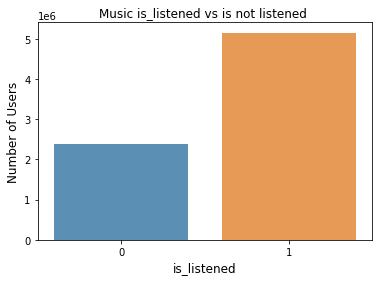

In [ ]:
# Plot target variable 'is_listened'
is_listened = df['is_listened'].value_counts()
fig, ax= plt.subplots()
sns.barplot(is_listened.index, is_listened.values, alpha=0.8)
plt.title('Music is_listened vs is not listened ')
plt.ylabel('Number of Users', fontsize=12)
plt.xlabel('is_listened', fontsize=12)
plt.show()

### User Perference Analysis based on `artist_id`, `album_id`, `media_id`,`context_type`, `platform_name`, `platform_family` & `listen_type`

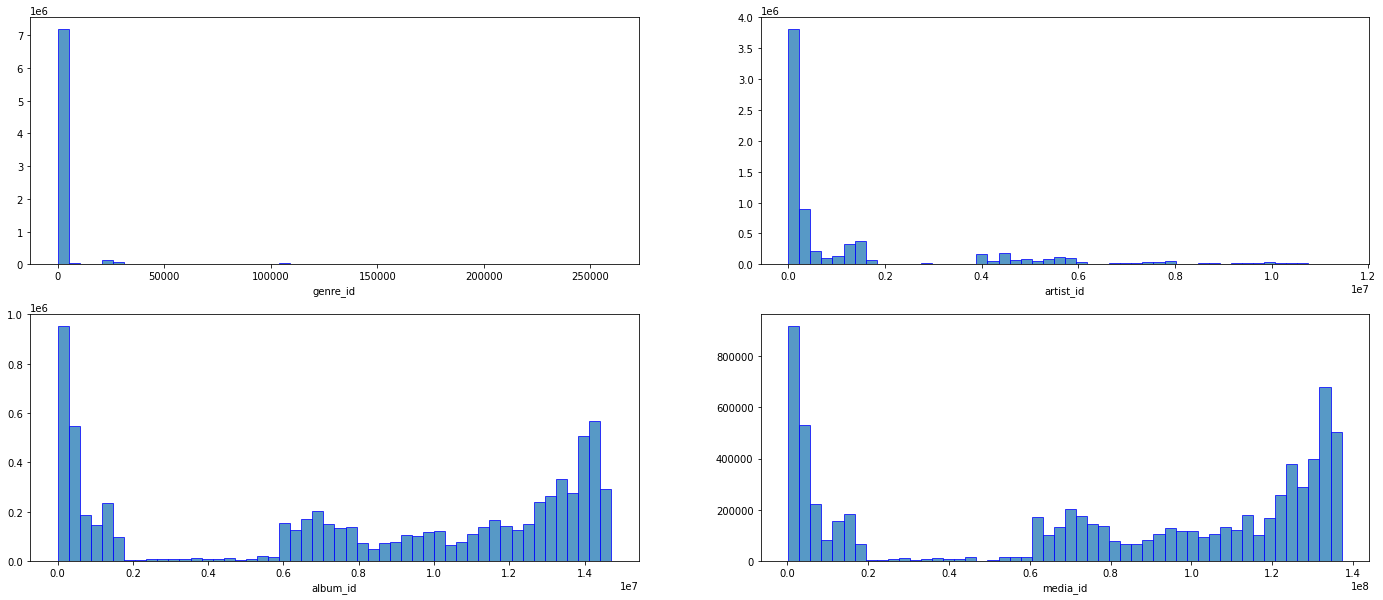

In [ ]:
# Visualize music related columns
music_var = df[["genre_id", "artist_id", "album_id", "media_id"]]
plt.figure(figsize=(24, 10))
cols = music_var.columns
for i in range(len(cols)):
    ax = plt.subplot(2, len(cols)/2, i+1)
    plt.hist(music_var[cols[i]], 50, density=False, edgecolor='b', alpha=0.75)
    plt.xlabel(cols[i])

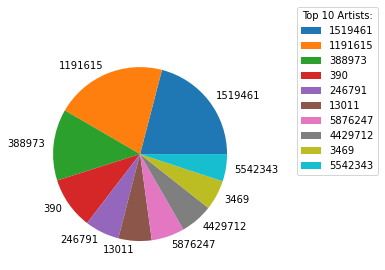

{390: 75457,
 3469: 43372,
 13011: 48187,
 246791: 49871,
 388973: 103569,
 1191615: 161397,
 1519461: 163382,
 4429712: 47359,
 5542343: 39518,
 5876247: 47977}

In [ ]:
# User Perference - Top 10 artists
artist_top10 = df[['artist_id','is_listened']].groupby(['artist_id'])['is_listened'] \
                             .size() \
                             .nlargest(10) \
                             .reset_index(name='top10')


plt.pie(artist_top10['top10'], labels = artist_top10['artist_id'])
plt.legend(bbox_to_anchor=(1.2,1.2),loc="upper left",title = "Top 10 Artists:")
plt.show()
            
artist_top10.set_index('artist_id').to_dict()['top10']

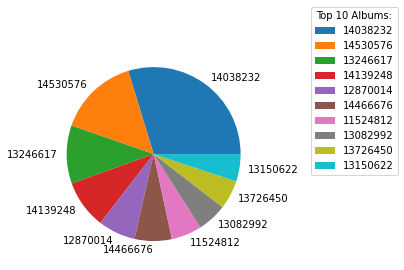

{11524812: 24245,
 12870014: 29727,
 13082992: 23642,
 13150622: 21820,
 13246617: 46306,
 13726450: 22891,
 14038232: 127196,
 14139248: 38665,
 14466676: 29517,
 14530576: 64080}

In [ ]:
# User Perference - Top 10 artists
album_top10 = df[['album_id','is_listened']].groupby(['album_id'])['is_listened'] \
                             .size() \
                             .nlargest(10) \
                             .reset_index(name='top10')


plt.pie(album_top10['top10'], labels = album_top10['album_id'])
plt.legend(bbox_to_anchor=(1.2,1.2),loc="upper left",title = "Top 10 Albums:")
plt.show()
            
album_top10.set_index('album_id').to_dict()['top10']

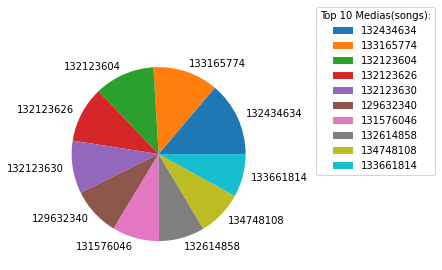

{129632340: 13075,
 131576046: 12709,
 132123604: 16284,
 132123626: 15130,
 132123630: 14341,
 132434634: 20147,
 132614858: 12393,
 133165774: 17652,
 133661814: 11663,
 134748108: 12256}

In [ ]:
# User Perference - Top 10 artists
media_top10 = df[['media_id','is_listened']].groupby(['media_id'])['is_listened'] \
                             .size() \
                             .nlargest(10) \
                             .reset_index(name='top10')


plt.pie(media_top10['top10'], labels = media_top10['media_id'])
plt.legend(bbox_to_anchor=(1.2,1.2),loc="upper left",title = "Top 10 Medias(songs):")
plt.show()
            
media_top10.set_index('media_id').to_dict()['top10']

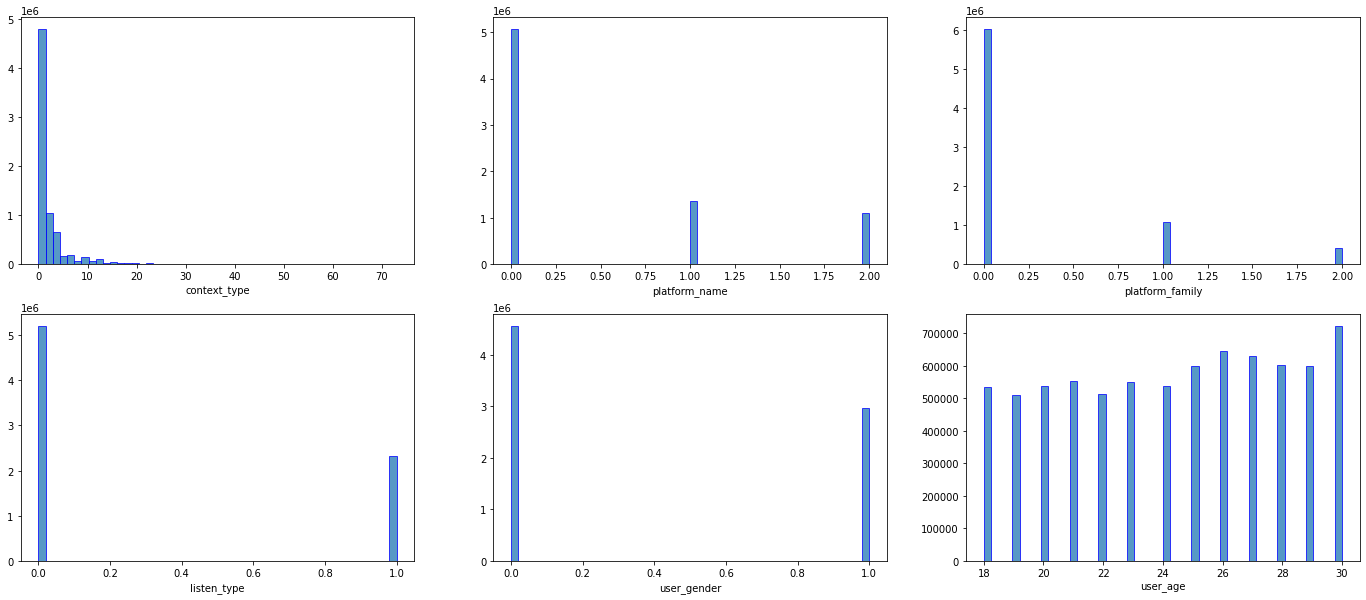

In [ ]:
# Visualize user related columns
x_var = df[["context_type", "platform_name", "platform_family", "listen_type","user_gender","user_age"]]
plt.figure(figsize=(24, 10))
cols = x_var.columns
for i in range(len(cols)):
    ax = plt.subplot(2, len(cols)/2, i+1)
    plt.hist(x_var[cols[i]], 50, density=False, edgecolor='b', alpha=0.75)
    plt.xlabel(cols[i])

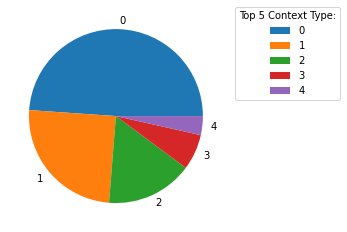

Type 0 is the most favorable context type by among the users


In [ ]:
# User Perference - Top 5 Contect Types
# a total 74 context_type, context_type 0 has the highest amount of user 3'182'377
context_t_top5 = df[['context_type','is_listened']].groupby(['context_type'])['is_listened'] \
                             .size() \
                             .nlargest(5) \
                             .reset_index(name='top5')


plt.pie(context_t_top5['top5'], labels = context_t_top5['context_type'])
plt.legend(bbox_to_anchor=(1.025,1.025),loc="upper left",title = "Top 5 Context Type:")
plt.show()
            
context_t_top5.set_index('context_type').to_dict()['top5']

print("Type 0 is the most favorable context type by among the users")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


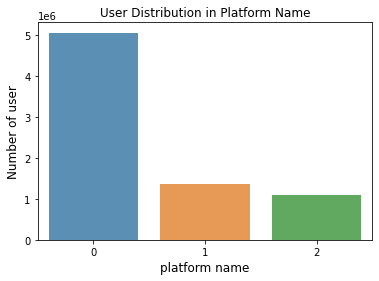

Majorty of users use platform name 0, then followed by platform name 1, and then platform name 2


In [ ]:
# plot platform_name distribution
platform_name = df['platform_name'].value_counts()
plt.figure()
sns.barplot(platform_name.index, platform_name.values, alpha=0.8)
plt.title('User Distribution in Platform Name')
plt.ylabel('Number of user', fontsize=12)
plt.xlabel('platform name', fontsize=12)
plt.show()

print("Majorty of users use platform name 0, then followed by platform name 1, and then platform name 2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


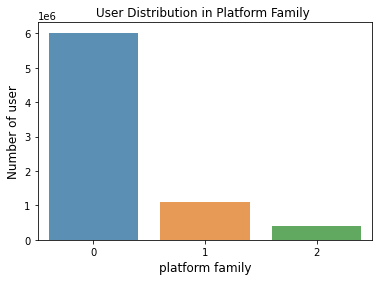

Majorty of users use platform family 0, then followed by platform family 1, and then platform family 2


In [ ]:
# plot platform_family distribution
platform_family = df['platform_family'].value_counts()
plt.figure()
sns.barplot(platform_family.index, platform_family.values, alpha=0.8)
plt.title('User Distribution in Platform Family ')
plt.ylabel('Number of user', fontsize=12)
plt.xlabel('platform family', fontsize=12)
plt.show()

print("Majorty of users use platform family 0, then followed by platform family 1, and then platform family 2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


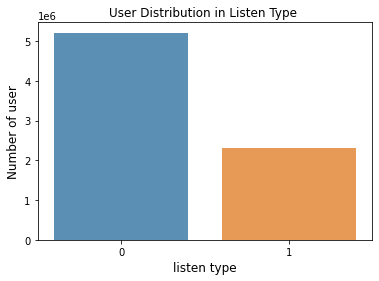

Majorty of users did not listen with the FLOW feature whihch refers to 1 in the bar chart above


In [ ]:
# plot User listen in Flow or not
listen_type = df['listen_type'].value_counts()
plt.figure()
sns.barplot(listen_type.index, listen_type.values, alpha=0.8)
plt.title('User Distribution in Listen Type ')
plt.ylabel('Number of user', fontsize=12)
plt.xlabel('listen type', fontsize=12)
plt.show()

print("Majorty of users did not listen with the FLOW feature whihch refers to 1 in the bar chart above")

### User Demography analysis `user_gender` & `user_age`

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


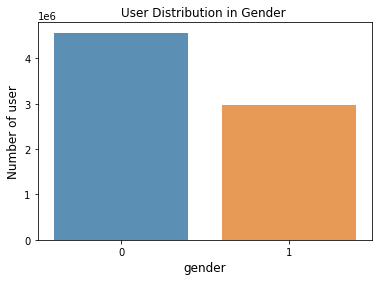

The numner of users gender 0 is greater than users gender 1


In [ ]:
# plot user gender distribution
user_gender = df['user_gender'].value_counts()
plt.figure()
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title('User Distribution in Gender ')
plt.ylabel('Number of user', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()

print("The numner of users gender 0 is greater than users gender 1")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


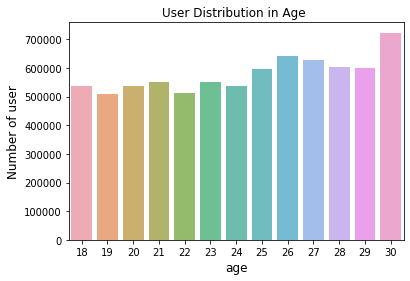

User age group 30 has the highest amont of users


In [ ]:
# plot user age distribution
age = df['user_age'].value_counts()
plt.figure()
sns.barplot(age.index, age.values, alpha=0.8)
plt.title('User Distribution in Age ')
plt.ylabel('Number of user', fontsize=12)
plt.xlabel('age', fontsize=12)
plt.show()

print("User age group 30 has the highest amont of users")


### User Listen Time Anaysis

/var/folders/qy/5fq64l116xd56rzr2bm208dm0000gn/T/ipykernel_73776/3996863672.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(2, len(cols)/2, i+1)


Sicne there are only one level in year, month, and season, these three variable shall be removed in the later analysis


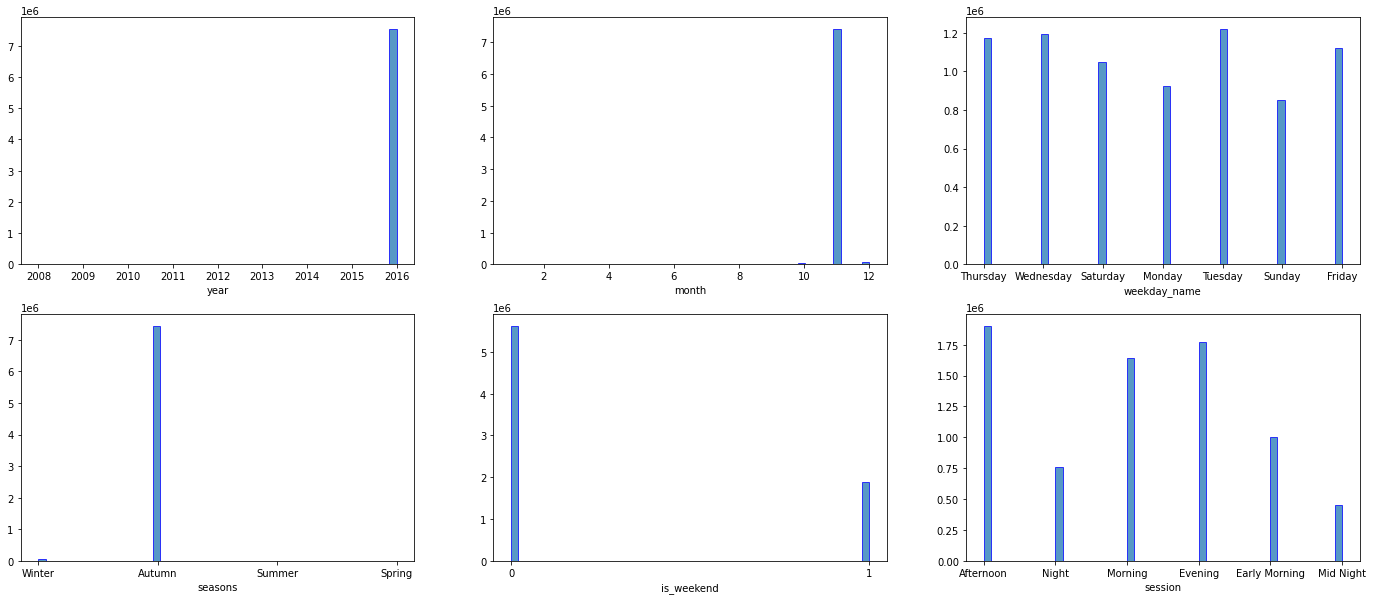

In [ ]:
# Visualize user listening activity columns
time_var = df[["year","month", "weekday_name","seasons", "is_weekend","session"]]
plt.figure(figsize=(24, 10))
cols = time_var.columns
for i in range(len(cols)):
    ax = plt.subplot(2, len(cols)/2, i+1)
    plt.hist(time_var[cols[i]], 50, density=False, edgecolor='b', alpha=0.75)
    plt.xlabel(cols[i])
    
print("Sicne there are only one level in year, month, and season, these three variable shall be removed in the later analysis")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


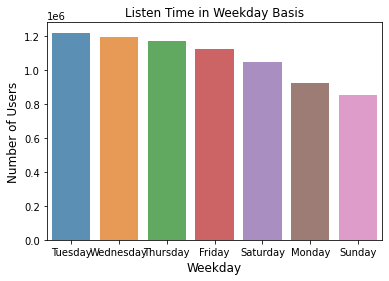

Users listen music during weekday more than on the weekednd, neverhthless, Monday is an exception


In [ ]:
# check user listening perference - weekday 
# users are actively listen music in Tuesday, Wednesday and Thrusday 
weekday = df['weekday_name'].value_counts()
plt.figure()
sns.barplot(weekday.index,weekday.values, alpha=0.8)
plt.title('Listen Time in Weekday Basis')
plt.ylabel('Number of Users', fontsize=12)
plt.xlabel('Weekday', fontsize=12)
plt.show()

print("Users listen music during weekday more than on the weekednd, neverhthless, Monday is an exception")

### Hourly basis analysis
We observerd that the number of listeners is dramatcally increase between 5am to 6am. The number continously raise and reach to 400000 users during 9am to 10am, then, the user number steadily increase after lunch time. In the afternoon, 16 and 17 pm have the higest amount of listners, which figures are above 500000. Following that, the number of users is constantly decrease in the evening and drop to 200000 at 23 pm. There are approxmatly 100000 active users using the app during the time between 1am to 5am.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


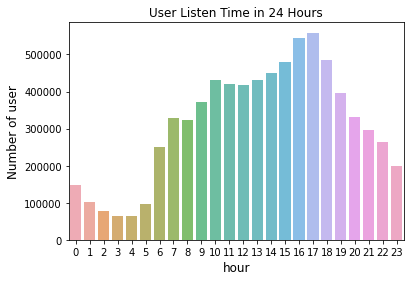

In [ ]:
# check user listening perference - hour 
hour = df['hour'].value_counts()
plt.figure()
sns.barplot(hour.index, hour.values, alpha=0.8)
plt.title('User Listen Time in 24 Hours')
plt.ylabel('Number of user', fontsize=12)
plt.xlabel('hour', fontsize=12)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


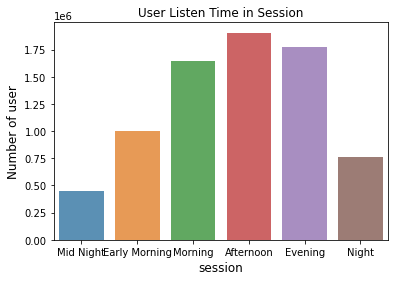

Users start to listen music from morning and reach to the peak in the afternoon then drop during the evening


In [ ]:
# check user listening perference - session 
session = df['session'].value_counts()
plt.figure()
sns.barplot(session.index, session.values, alpha=0.8)
plt.title('User Listen Time in Session')
plt.ylabel('Number of user', fontsize=12)
plt.xlabel('session', fontsize=12)
plt.show()

print("Users start to listen music from morning and reach to the peak in the afternoon then drop during the evening")

## Genre Analysis

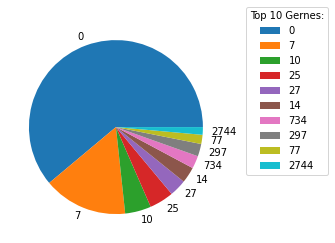

{0: 3637586,
 7: 929380,
 10: 288217,
 25: 268997,
 27: 187933,
 14: 177094,
 734: 141060,
 297: 137968,
 77: 101092,
 2744: 84686}

In [ ]:
# Get top 10 gerne which are listeded by user
genre_top10 = df[['genre_id','is_listened']].groupby(['genre_id'])['is_listened'] \
                             .size() \
                             .nlargest(10) \
                             .reset_index(name='top_10')

# Visualize Top 5 gerne in pie chart
plt.pie(genre_top10['top_10'], labels = genre_top10['genre_id'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Top 10 Gernes:")
plt.show()
            
genre_top10.set_index('genre_id').to_dict()['top_10']

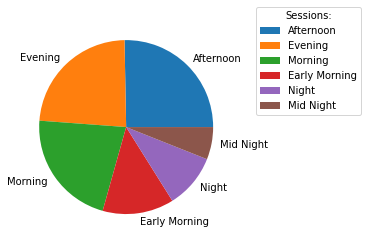

{'Afternoon': 1904733,
 'Evening': 1771279,
 'Morning': 1642829,
 'Early Morning': 998796,
 'Night': 758314,
 'Mid Night': 453085}

In [ ]:
# Count number of gernes in each session
genre_perf_session = df[['genre_id','session']].groupby(['session'])['genre_id'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \

# Visualize user listen time based on session
plt.pie(genre_perf_session['count'], labels = genre_perf_session['session'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Sessions:")
plt.show()

genre_perf_session.set_index('session').to_dict()['count']

In [ ]:
# Group by session to get poppular genres that are lisnted in each session
by_session = df.groupby(["session", "genre_id"], as_index=False)["is_listened"].count()

'''
it is diffclut to see details of each group in session in the dataset `by_session`, 
the data needs to be split in to different groups by using groupby and get_gourp functions
'''

# Create session_groups with specific column `session`
session_groups = by_session.groupby("session")

# use .get_group() as a way to drill down to the sub-table from a single group in session
Afternoon = session_groups.get_group("Afternoon").sort_values(by = 'is_listened', ascending = False).head(10)

Evening = session_groups.get_group("Evening").sort_values(by = 'is_listened', ascending = False).head(10)

Morning = session_groups.get_group("Morning").sort_values(by = 'is_listened', ascending = False).head(10)

Early_Morning = session_groups.get_group("Early Morning").sort_values(by = 'is_listened', ascending = False).head(10)

Night = session_groups.get_group("Night").sort_values(by = 'is_listened', ascending = False).head(10)

Mid_Night = session_groups.get_group("Mid Night").sort_values(by = 'is_listened', ascending = False).head(10)


### Genre preference during afternoon and evening 

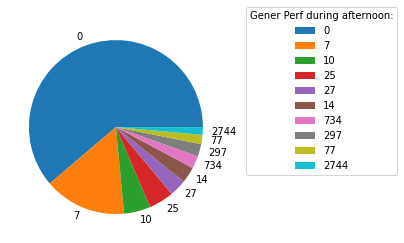

{0: 924253, 7: 230360, 10: 74564, 25: 69735, 27: 47782, 14: 44909, 734: 35361, 297: 34786, 77: 26025, 2744: 21498}


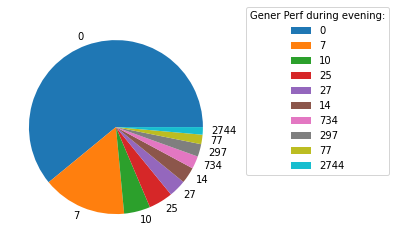

{0: 854296, 7: 218284, 10: 68455, 25: 63159, 27: 45353, 14: 42205, 734: 33084, 297: 32782, 77: 24621, 2744: 19656}


In [ ]:
# Visualise top 10 genre during Afternoon
plt.pie(Afternoon['is_listened'], labels = Afternoon['genre_id'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Gener Perf during afternoon:")
plt.show()

print(Afternoon.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genre during Evening
plt.pie(Evening['is_listened'], labels = Evening['genre_id'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Gener Perf during evening:")
plt.show()

print(Evening.set_index('genre_id').to_dict()['is_listened'])

### Gerne perference in Early morning and  Morning

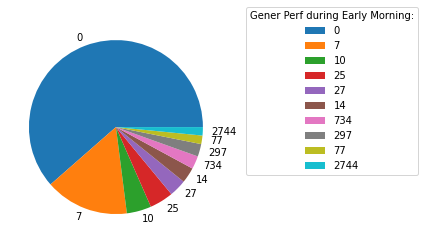

{0: 488800, 7: 123707, 10: 36323, 25: 35121, 27: 25520, 14: 23001, 734: 19325, 297: 18574, 77: 12564, 2744: 12395}


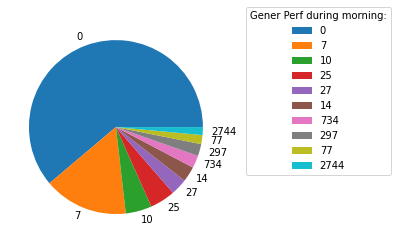

{0: 797926, 7: 204120, 10: 63371, 25: 61355, 27: 40095, 14: 37238, 734: 30262, 297: 29094, 77: 21843, 2744: 19171}


In [ ]:
# Visualise top 10 genre during Early_Morning
plt.pie(Early_Morning['is_listened'], labels = Early_Morning['genre_id'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Gener Perf during Early Morning:")
plt.show()

print(Early_Morning.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genre during Morning
plt.pie(Morning['is_listened'], labels = Morning['genre_id'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Gener Perf during morning:")
plt.show()

print(Morning.set_index('genre_id').to_dict()['is_listened'])

### Gerne Perference during Night and Midnight

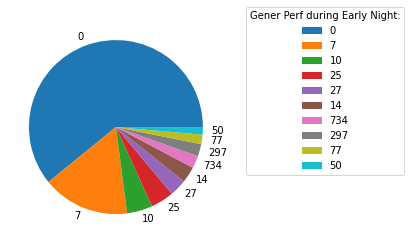

{0: 360883, 7: 95969, 10: 28193, 25: 25449, 27: 18662, 14: 17828, 734: 13692, 297: 13523, 77: 10412, 50: 8249}


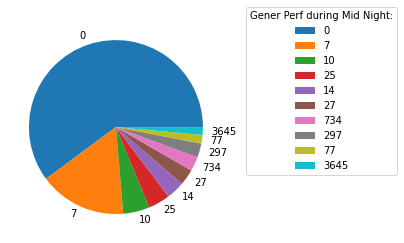

{0: 211428, 7: 56940, 10: 17311, 25: 14178, 14: 11913, 27: 10521, 734: 9336, 297: 9209, 77: 5627, 3645: 5073}


In [ ]:
# Visualise top 10 genre during Night
plt.pie(Night['is_listened'], labels = Night['genre_id'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Gener Perf during Early Night:")
plt.show()

print(Night.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genre during Mid_Night
plt.pie(Mid_Night['is_listened'], labels = Mid_Night['genre_id'])
plt.legend(bbox_to_anchor=(1.075,1.075),loc="upper left",title = "Gener Perf during Mid Night:")
plt.show()

print(Mid_Night.set_index('genre_id').to_dict()['is_listened'])

## Summary Session v.s Genre

 - `genre_id 0`, is the most popular gerne amongest the top 5 ranking
 - `genre_id 0, 7, 10 ,25, 27, 14, 734, 297, 2744` are the most popular genres across most of session expet night and midnight
 - `genre_id 2744` is not popular during night and midnight, `genre_id 50` is perferable during the Night and `genre_id 3645` in the midnight

## Genre perference in `listen_type`  - **FLOW**


In the dataset `listen_type`, `1` refers to listen in flow and `0` user not listen in flow. Flow is a new feature that offers mixed musics based on user listening histroy. The system recommends new tracks based on songs users already listened and liked.


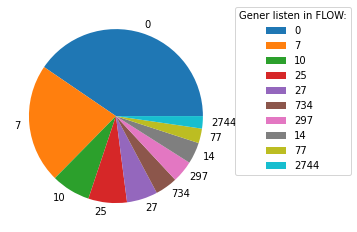

{0: 694920, 7: 380534, 10: 124351, 25: 123026, 27: 98569, 734: 71113, 297: 70007, 14: 68217, 77: 46547, 2744: 39660}


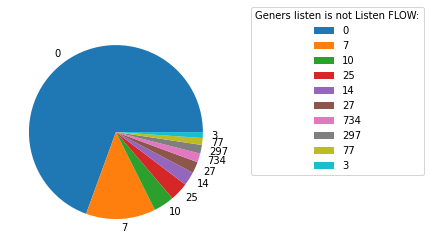

{0: 2942666, 7: 548846, 10: 163866, 25: 145971, 14: 108877, 27: 89364, 734: 69947, 297: 67961, 77: 54545, 3: 46183}
Users listen different types of musics when using FLOW, Genre 0 is listened four times more when users listen without using FLOW


In [ ]:
# Group listen_type list top 10 genres are lisnted in each types
by_listen_type = df.groupby(["listen_type", "genre_id"], as_index=False)["is_listened"].count()

# set specific column `listen_type`
listen_t_gps = by_listen_type.groupby("listen_type")

# listen_type 1 = users listen in FLOW, 0 = not listen in FlOW
inflow = listen_t_gps.get_group(1).sort_values(by = 'is_listened', ascending = False).head(10)

isnot_inflow = listen_t_gps.get_group(0).sort_values(by = 'is_listened', ascending = False).head(10)

# Visualise top 10 genre listen in FLOW
plt.pie(inflow['is_listened'], labels = inflow['genre_id'])
plt.legend(bbox_to_anchor=(1.025,1.025),loc="upper left",title = "Gener listen in FLOW:")
plt.show()

print(inflow.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genres isnot_inflow
plt.pie(isnot_inflow['is_listened'], labels = isnot_inflow['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = "Geners listen is not Listen FLOW:")
plt.show()

print(isnot_inflow.set_index('genre_id').to_dict()['is_listened'])

print("Users listen different types of musics when using FLOW, Genre 0 is listened four times more when users listen without using FLOW")

## Genre perference in `platform_name`

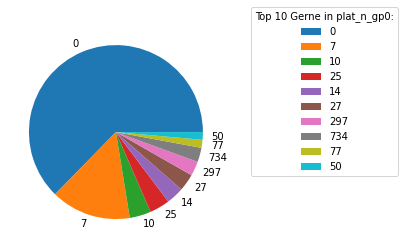

{0: 2541691, 7: 603520, 10: 160724, 25: 152360, 14: 132715, 27: 129382, 297: 109441, 734: 107638, 77: 60305, 50: 57573}


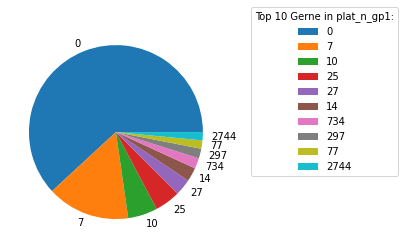

{0: 666338, 7: 165774, 10: 59229, 25: 51296, 27: 32891, 14: 27667, 734: 21196, 297: 19365, 77: 16725, 2744: 16458}


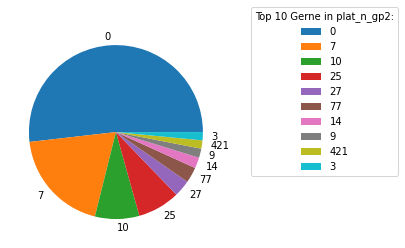

{0: 429557, 7: 160086, 10: 68264, 25: 65341, 27: 25660, 77: 24062, 14: 16712, 9: 14062, 421: 12829, 3: 12578}


In [ ]:
# Group by platform_name and aggregate genres are listened by user
by_plat_name = df.groupby(["platform_name", "genre_id"], as_index=False)["is_listened"].count()

# Set specific column `listen_type`
plat_n_gps = by_plat_name.groupby("platform_name")

# spilt platform_name into 3 groups 
plat_n_gp0 = plat_n_gps.get_group(0).sort_values(by = 'is_listened', ascending = False).head(10)

plat_n_gp1 = plat_n_gps.get_group(1).sort_values(by = 'is_listened', ascending = False).head(10)

plat_n_gp2 = plat_n_gps.get_group(2).sort_values(by = 'is_listened', ascending = False).head(10)

# Visualise top 10 genres plat_n_gp0
plt.pie(plat_n_gp0['is_listened'], labels = plat_n_gp0['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = "Top 10 Gerne in plat_n_gp0:")
plt.show()

print(plat_n_gp0.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genres plat_n_gp1
plt.pie(plat_n_gp1['is_listened'], labels = plat_n_gp1['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = "Top 10 Gerne in plat_n_gp1:")
plt.show()

print(plat_n_gp1.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genres in plat_n_gp2
plt.pie(plat_n_gp2['is_listened'], labels = plat_n_gp2['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = "Top 10 Gerne in plat_n_gp2:")
plt.show()

print(plat_n_gp2.set_index('genre_id').to_dict()['is_listened'])

## Gerne perference in `platform_family`

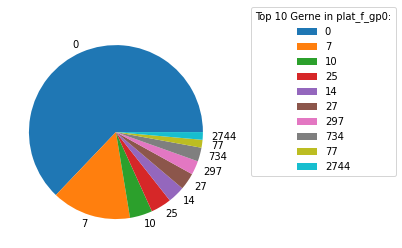

{0: 3028206, 7: 708837, 10: 201885, 25: 184946, 14: 153498, 27: 151558, 297: 124282, 734: 123878, 77: 70241, 2744: 68559}


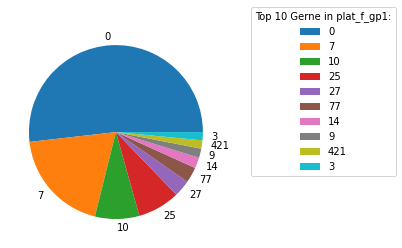

{0: 429557, 7: 160086, 10: 68264, 25: 65341, 27: 25660, 77: 24062, 14: 16712, 9: 14062, 421: 12829, 3: 12578}


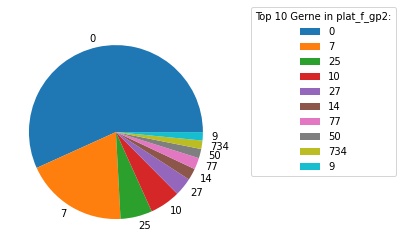

{0: 179823, 7: 60457, 25: 18710, 10: 18068, 27: 10715, 14: 6884, 77: 6789, 50: 5458, 734: 4956, 9: 4939}


In [ ]:
# Group by platform_family and aggregate genres are listened by user
by_plat_f = df.groupby(["platform_family", "genre_id"], as_index=False)["is_listened"].count()
# set specific column `listen_type`
plat_f_gps = by_plat_f.groupby("platform_family")

# spilt platform_name into 3 groups 
plat_f_gp0 = plat_f_gps.get_group(0).sort_values(by = 'is_listened', ascending = False).head(10)

plat_f_gp1 = plat_f_gps.get_group(1).sort_values(by = 'is_listened', ascending = False).head(10)

plat_f_gp2 = plat_f_gps.get_group(2).sort_values(by = 'is_listened', ascending = False).head(10)

# Visualise top 10 genres plat_f_gp0
plt.pie(plat_f_gp0['is_listened'], labels = plat_f_gp0['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = "Top 10 Gerne in plat_f_gp0:")
plt.show()

print(plat_f_gp0.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genres plat_f_gp1
plt.pie(plat_f_gp1['is_listened'], labels = plat_f_gp1['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = "Top 10 Gerne in plat_f_gp1:")
plt.show()

print(plat_f_gp1.set_index('genre_id').to_dict()['is_listened'])

# Visualise top 10 genres in plat_f_gp2
plt.pie(plat_f_gp2['is_listened'], labels = plat_f_gp2['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = "Top 10 Gerne in plat_f_gp2:")
plt.show()

print(plat_f_gp2.set_index('genre_id').to_dict()['is_listened'])

### Song Listened in user_age group 
 - user age 30 listened 540'468 Songs
 - user age at 19 listened the leaset number of songs among the user age group
 - user age 26 skipped 196'256 Songs among the user age group

In [ ]:
df.groupby(["user_age", 'is_listened'], as_index=False)['media_id'].count()

,user_age,is_listened,media_id
0,18,0,192215
1,18,1,343083
2,19,0,181932
3,19,1,326944
4,20,0,194486
5,20,1,343846
6,21,0,191448
7,21,1,360603
8,22,0,184616
9,22,1,328497


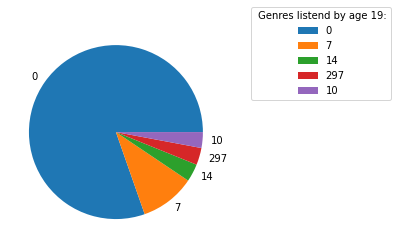

{0: 318078, 7: 40465, 14: 13064, 297: 12562, 10: 11626}


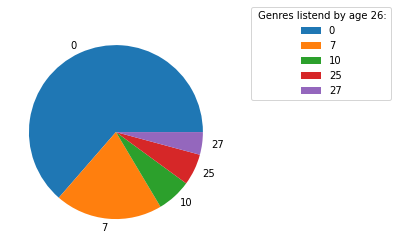

{0: 284985, 7: 89444, 10: 28657, 25: 26177, 27: 18808}


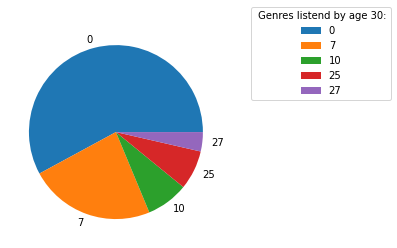

{0: 279066, 7: 112631, 10: 37726, 25: 35226, 27: 17286}


In [ ]:
genre_by_age = df.groupby(["genre_id","user_age"], as_index=False)['is_listened'].count()

# set specific column 
genre_age_gps = genre_by_age.groupby("user_age")


# Visualise 
age_19 =genre_age_gps.get_group(19).sort_values(by = 'is_listened', ascending = False).head(5)

plt.pie(age_19['is_listened'], labels = age_19['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = " Genres listend by age 19:")
plt.show()

print(age_19.set_index('genre_id').to_dict()['is_listened'])

# Visualise 
age_26 =genre_age_gps.get_group(26).sort_values(by = 'is_listened', ascending = False).head(5)

plt.pie(age_26['is_listened'], labels = age_26['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = " Genres listend by age 26:")
plt.show()

print(age_26.set_index('genre_id').to_dict()['is_listened'])

# Visualise 
age_30 =genre_age_gps.get_group(30).sort_values(by = 'is_listened', ascending = False).head(5)

plt.pie(age_30['is_listened'], labels = age_30['genre_id'])
plt.legend(bbox_to_anchor=(1.1,1.1),loc="upper left",title = " Genres listend by age 30:")
plt.show()

print(age_30.set_index('genre_id').to_dict()['is_listened'])


## Media usage and user listening pattarn analysis
As we found majority user share common interests in some genres, we will further analysis music data based on media usage and evelauate user listien patterns

### Create a new datframe `deezer_df `  

In [ ]:
deezer_df = df.copy()

In [ ]:
# Add listen_start , listen_next to store media relate values
deezer_df['listen_start'] = deezer_df['ts_listen'] 
deezer_df['listen_next'] = deezer_df['ts_listen']

### Sorting value based on `user_id` and start listening time `listen_start`

In [ ]:
deezer_df = deezer_df.sort_values(by=['user_id', 'listen_start'],ascending=True)
print(deezer_df)

        genre_id   ts_listen     listen_datetime listen_date  year  month  \
682493         0  1477939775 2016-10-31 18:49:35  2016-10-31  2016     10   
4454939        0  1477982531 2016-11-01 06:42:11  2016-11-01  2016     11   
5354523        0  1477982561 2016-11-01 06:42:41  2016-11-01  2016     11   
5899458        0  1477982582 2016-11-01 06:43:02  2016-11-01  2016     11   
4716574        0  1477982792 2016-11-01 06:46:32  2016-11-01  2016     11   
...          ...         ...                 ...         ...   ...    ...   
2549309        0  1480199244 2016-11-26 22:27:24  2016-11-26  2016     11   
2857394        0  1478202323 2016-11-03 19:45:23  2016-11-03  2016     11   
4242361     1153  1477940225 2016-10-31 18:57:05  2016-10-31  2016     10   
569368         0  1477512816 2016-10-26 20:13:36  2016-10-26  2016     10   
4791398       25  1477926978 2016-10-31 15:16:18  2016-10-31  2016     10   

         day seasons weekday_name is_weekend  ... platform_family  \
682493

In [ ]:
# using .shift(1) to capture user listen forward to next song
deezer_df['listen_next'] = deezer_df.groupby("user_id")["listen_start"].shift(-1)
print(deezer_df[['user_id','listen_start', 'listen_next']])

        user_id  listen_start   listen_next
682493        0    1477939775  1.477983e+09
4454939       0    1477982531  1.477983e+09
5354523       0    1477982561  1.477983e+09
5899458       0    1477982582  1.477983e+09
4716574       0    1477982792  1.477983e+09
...         ...           ...           ...
2549309   19913    1480199244           NaN
2857394   19914    1478202323           NaN
4242361   19915    1477940225           NaN
569368    19916    1477512816           NaN
4791398   19917    1477926978           NaN

[7529036 rows x 3 columns]


In [ ]:
# calculating differece between start listening to the next song play
deezer_df['listen_diff'] = deezer_df['listen_next'] - deezer_df['listen_start']

In [ ]:
# check if there is a gap in between songs play
deezer_df['time_gap'] = deezer_df['listen_next'] - deezer_df['listen_start'] - deezer_df['media_duration']

In [ ]:
# cauculating the percentage of listening a song
deezer_df['listen_percent'] = round(deezer_df['listen_diff']/deezer_df['media_duration'],2)

In [ ]:
# convert to date time formate YYYY-MM-DD %H%M%S dtype: datetime64[ns]
deezer_df['listen_start'] = pd.to_datetime(deezer_df['listen_start']*1000000000)
deezer_df['listen_next'] = pd.to_datetime(deezer_df['listen_next']*1000000000)

In [ ]:
# remove columns 'year', 'month', 'seasons' as there is only one level in each variable
deezer_df.drop(['year', 'month', 'seasons'], axis=1, inplace=True)

In [ ]:
deezer_df.head(5)

,genre_id,ts_listen,listen_datetime,listen_date,day,weekday_name,is_weekend,session,hour,minutes,...,user_gender,user_id,artist_id,user_age,is_listened,listen_start,listen_next,listen_diff,time_gap,listen_percent
682493,0,1477939775,2016-10-31 18:49:35,2016-10-31,31,Monday,0,Evening,18,49,...,0,0,7508018,26,1,2016-10-31 18:49:35,2016-11-01 06:42:11,42756.0,42562.0,220.39
4454939,0,1477982531,2016-11-01 06:42:11,2016-11-01,1,Tuesday,0,Early Morning,6,42,...,0,0,1035779,26,0,2016-11-01 06:42:11,2016-11-01 06:42:41,30.0,-286.0,0.09
5354523,0,1477982561,2016-11-01 06:42:41,2016-11-01,1,Tuesday,0,Early Morning,6,42,...,0,0,4331004,26,0,2016-11-01 06:42:41,2016-11-01 06:43:02,21.0,-203.0,0.09
5899458,0,1477982582,2016-11-01 06:43:02,2016-11-01,1,Tuesday,0,Early Morning,6,43,...,0,0,3469,26,1,2016-11-01 06:43:02,2016-11-01 06:46:32,210.0,0.0,1.00
4716574,0,1477982792,2016-11-01 06:46:32,2016-11-01,1,Tuesday,0,Early Morning,6,46,...,0,0,282118,26,1,2016-11-01 06:46:32,2016-11-01 06:49:38,186.0,1.0,1.01


In [ ]:
# check unique value in each column
deezer_df.nunique()

genre_id              2922
ts_listen          2253622
listen_datetime    2253622
listen_date            140
day                     31
weekday_name             7
is_weekend               2
session                  6
hour                    24
minutes                 60
seconds                 60
media_id            452735
album_id            151367
context_type            74
release_date          8874
release_year            86
platform_name            3
platform_family          3
media_duration        1652
listen_type              2
user_gender              2
user_id              19911
artist_id            67102
user_age                13
is_listened              2
listen_start       2253622
listen_next        2248105
listen_diff         127714
time_gap            129097
listen_percent       82321
dtype: int64

In [ ]:
# No. of songs listened per age group
# User age 30 listented the most of song, whereas, age 19 listen the least song
age_song_count = deezer_df.groupby(['user_age']).agg({'media_id':'count'}).rename(columns={'media_id':'song_count'})
age_song_count.sort_values(by = 'song_count', ascending = False)

,song_count
user_age,
30,723026
26,643391
27,628726
28,601831
29,598620
25,597540
21,552051
23,549973
20,538332


In [ ]:
# No of songs listened in FLOW or without using FLOW
flow_song_count = deezer_df.groupby(['listen_type']).agg({'media_id':'count'}).rename(columns={'media_id':'song_count'})
flow_song_count.sort_values(by = 'song_count', ascending = False)

In [ ]:
# avg song listen percentage across all age groups
age_lis_percent = deezer_df.groupby(['user_age','media_id','listen_percent']).agg({'media_id':'count','listen_percent':'mean'}).rename(columns={'media_id':'song_count','listen_percent':'avg_lis_percent'})
age_lis_percent.sort_values(by = 'avg_lis_percent', ascending = False)